In [95]:
import pandas as pd
import numpy as np

In [96]:
df_0 = pd.read_csv('SSDSE-A-2022.csv', encoding='shift-jis', index_col='SSDSE-A-2022')
df_0.columns = df_0.loc['地域コード'].values.tolist() # リストに変換してカラム名に指定
df_0 = df_0.drop(['area/year', '地域コード'], axis=0)
df_0.head()

,都道府県,市区町村,総人口,総人口（男）,総人口（女）,日本人人口,日本人人口（男）,日本人人口（女）,15歳未満人口,15歳未満人口（男）,...,飲食店数,大型小売店数,一般病院数,一般診療所数,歯科診療所数,医師数,歯科医師数,薬剤師数,保育所等数（基本票）,総人口（2015）
SSDSE-A-2022,,,,,,,,,,,,,,,,,,,,,
R01100,北海道,札幌市,1973395,918682,1054713,1933094,897727,1035367,215366,110196,...,8502,355,178,1378,1222,6763,2094,5485,325,1952356
R01202,北海道,函館市,251084,113965,137119,248208,112718,135490,23560,11984,...,1749,41,26,212,128,787,187,700,53,265979
R01203,北海道,小樽市,111299,50136,61163,109971,49441,60530,9169,4678,...,778,17,12,82,78,330,98,348,22,121924
R01204,北海道,旭川市,329306,152108,177198,325287,150318,174969,34691,17797,...,1743,65,36,230,170,1364,254,879,71,339605
R01205,北海道,室蘭市,82383,40390,41993,81658,39960,41698,7769,3916,...,621,11,6,53,41,252,59,195,11,88564


In [97]:
prefecture = df_0.loc[:, '都道府県'].values.tolist()
municipality = df_0.loc[:, '市区町村'].values.tolist()
list = []
for i in range(1741):
    list.append(municipality[i] + '（' + prefecture[i] + '）')
df_0.index = list
df_0.index.name = 'city'

In [98]:
df_0 = df_0.drop(['都道府県', '市区町村'], axis=1)
df_0 = df_0.astype(np.float64) # objectからfloatへ型変換
df_0.head()

,総人口,総人口（男）,総人口（女）,日本人人口,日本人人口（男）,日本人人口（女）,15歳未満人口,15歳未満人口（男）,15歳未満人口（女）,15〜64歳人口,...,飲食店数,大型小売店数,一般病院数,一般診療所数,歯科診療所数,医師数,歯科医師数,薬剤師数,保育所等数（基本票）,総人口（2015）
city,,,,,,,,,,,,,,,,,,,,,
札幌市（北海道）,1973395.0000,918682.0000,1054713.0000,1933094.0000,897727.0000,1035367.0000,215366.0000,110196.0000,105170.0000,1185724.0000,...,8502.0000,355.0000,178.0000,1378.0000,1222.0000,6763.0000,2094.0000,5485.0000,325.0000,1952356.0000
函館市（北海道）,251084.0000,113965.0000,137119.0000,248208.0000,112718.0000,135490.0000,23560.0000,11984.0000,11576.0000,134953.0000,...,1749.0000,41.0000,26.0000,212.0000,128.0000,787.0000,187.0000,700.0000,53.0000,265979.0000
小樽市（北海道）,111299.0000,50136.0000,61163.0000,109971.0000,49441.0000,60530.0000,9169.0000,4678.0000,4491.0000,55643.0000,...,778.0000,17.0000,12.0000,82.0000,78.0000,330.0000,98.0000,348.0000,22.0000,121924.0000
旭川市（北海道）,329306.0000,152108.0000,177198.0000,325287.0000,150318.0000,174969.0000,34691.0000,17797.0000,16894.0000,178060.0000,...,1743.0000,65.0000,36.0000,230.0000,170.0000,1364.0000,254.0000,879.0000,71.0000,339605.0000
室蘭市（北海道）,82383.0000,40390.0000,41993.0000,81658.0000,39960.0000,41698.0000,7769.0000,3916.0000,3853.0000,43398.0000,...,621.0000,11.0000,6.0000,53.0000,41.0000,252.0000,59.0000,195.0000,11.0000,88564.0000


In [99]:
small = (df_0['総人口'] > 0) & (df_0['総人口'] < 100000) # 2020年時点で人口0人の双葉町は削除
print(small.sum())
print((small.sum() / 1741) * 100)

1457
83.68753589890868


In [100]:
medium = (df_0['総人口'] >= 100000) & (df_0['総人口'] < 300000)
print(medium.sum())
print((medium.sum() / 1741) * 100)

197
11.315336013785181


In [101]:
large = df_0['総人口'] >= 300000
print(large.sum())
print((large.sum() / 1741) * 100)

86
4.939689833429064


In [102]:
df = df_0[small]
df = df.drop('千代田区（東京都）') # 東京23区で入っている千代田区の削除
df = df.loc[:, ['総人口', '小学校数', '小学校教員数', '小学校児童数', '中学校数', '中学校教員数',  '中学校生徒数', '一般病院数', 
                '一般診療所数', '歯科診療所数', '医師数', '歯科医師数', '薬剤師数']]
df

,総人口,小学校数,小学校教員数,小学校児童数,中学校数,中学校教員数,中学校生徒数,一般病院数,一般診療所数,歯科診療所数,医師数,歯科医師数,薬剤師数
city,,,,,,,,,,,,,
室蘭市（北海道）,82383.0000,10.0000,236.0000,3312.0000,8.0000,145.0000,1700.0000,6.0000,53.0000,41.0000,252.0000,59.0000,195.0000
夕張市（北海道）,7334.0000,1.0000,22.0000,187.0000,1.0000,17.0000,100.0000,0.0000,6.0000,5.0000,7.0000,8.0000,16.0000
岩見沢市（北海道）,79306.0000,14.0000,298.0000,3483.0000,9.0000,183.0000,1862.0000,5.0000,59.0000,49.0000,182.0000,63.0000,141.0000
網走市（北海道）,35759.0000,9.0000,182.0000,1631.0000,6.0000,109.0000,821.0000,4.0000,13.0000,16.0000,61.0000,22.0000,55.0000
留萌市（北海道）,20114.0000,5.0000,99.0000,788.0000,2.0000,45.0000,450.0000,2.0000,16.0000,13.0000,44.0000,14.0000,51.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
久米島町（沖縄県）,7192.0000,6.0000,72.0000,461.0000,2.0000,27.0000,216.0000,1.0000,3.0000,2.0000,6.0000,2.0000,9.0000
八重瀬町（沖縄県）,30941.0000,4.0000,134.0000,2518.0000,2.0000,73.0000,971.0000,1.0000,12.0000,7.0000,74.0000,17.0000,37.0000
多良間村（沖縄県）,1058.0000,1.0000,12.0000,84.0000,1.0000,12.0000,29.0000,0.0000,1.0000,1.0000,1.0000,2.0000,0.0000


In [103]:
df.loc[:, '小学校1校当たり児童数'] = df.loc[:, '小学校児童数'] / df.loc[:, '小学校数']
df.loc[:, '小学校教員1人当たり児童数'] = df.loc[:, '小学校児童数'] / df.loc[:, '小学校教員数']
df.loc[:, '中学校1校当たりの児童数'] = df.loc[:, '中学校生徒数'] / df.loc[:, '中学校数']
df.loc[:, '中学校教員1人当たり生徒数'] = df.loc[:, '中学校生徒数'] / df.loc[:, '中学校教員数']
df.loc[:, '人口10万人当たり一般病院数'] = df.loc[:, '一般病院数'] / df.loc[:, '総人口'] * 100000
df.loc[:, '人口10万人当たり一般診療所数'] = df.loc[:, '一般診療所数'] / df.loc[:, '総人口'] * 100000
df.loc[:, '人口10万人当たり歯科診療所数'] = df.loc[:, '歯科診療所数'] / df.loc[:, '総人口'] * 100000
df.loc[:, '人口10万人当たり医師数'] = df.loc[:, '医師数'] / df.loc[:, '総人口'] * 100000
df.loc[:, '人口10万人当たり歯科医師数'] = df.loc[:, '歯科医師数'] / df.loc[:, '総人口'] * 100000
df.loc[:, '人口10万人当たり薬剤師数'] = df.loc[:, '薬剤師数'] / df.loc[:, '総人口'] * 100000
df = df.drop(df.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]], axis=1)
df.head()

,小学校1校当たり児童数,小学校教員1人当たり児童数,中学校1校当たりの児童数,中学校教員1人当たり生徒数,人口10万人当たり一般病院数,人口10万人当たり一般診療所数,人口10万人当たり歯科診療所数,人口10万人当たり医師数,人口10万人当たり歯科医師数,人口10万人当たり薬剤師数
city,,,,,,,,,,
室蘭市（北海道）,331.2000,14.0339,212.5000,11.7241,7.2831,64.3337,49.7675,305.8884,71.6167,236.6993
夕張市（北海道）,187.0000,8.5000,100.0000,5.8824,0.0000,81.8107,68.1756,95.4459,109.0810,218.1620
岩見沢市（北海道）,248.7857,11.6879,206.8889,10.1749,6.3047,74.3954,61.7860,229.4908,79.4391,177.7923
網走市（北海道）,181.2222,8.9615,136.8333,7.5321,11.1860,36.3545,44.7440,170.5864,61.5230,153.8074
留萌市（北海道）,157.6000,7.9596,225.0000,10.0000,9.9433,79.5466,64.6316,218.7531,69.6033,253.5547


In [104]:
df = df.replace(np.inf, np.nan) # 小中学校が無いとInfになるので，nanに置き換え
df = df.fillna(0) # nanを0で埋める
df.head()

,小学校1校当たり児童数,小学校教員1人当たり児童数,中学校1校当たりの児童数,中学校教員1人当たり生徒数,人口10万人当たり一般病院数,人口10万人当たり一般診療所数,人口10万人当たり歯科診療所数,人口10万人当たり医師数,人口10万人当たり歯科医師数,人口10万人当たり薬剤師数
city,,,,,,,,,,
室蘭市（北海道）,331.2000,14.0339,212.5000,11.7241,7.2831,64.3337,49.7675,305.8884,71.6167,236.6993
夕張市（北海道）,187.0000,8.5000,100.0000,5.8824,0.0000,81.8107,68.1756,95.4459,109.0810,218.1620
岩見沢市（北海道）,248.7857,11.6879,206.8889,10.1749,6.3047,74.3954,61.7860,229.4908,79.4391,177.7923
網走市（北海道）,181.2222,8.9615,136.8333,7.5321,11.1860,36.3545,44.7440,170.5864,61.5230,153.8074
留萌市（北海道）,157.6000,7.9596,225.0000,10.0000,9.9433,79.5466,64.6316,218.7531,69.6033,253.5547


In [105]:
C = df.index.values
F = df.columns.values
print(C)
print(F)

['室蘭市（北海道）' '夕張市（北海道）' '岩見沢市（北海道）' ... '多良間村（沖縄県）' '竹富町（沖縄県）' '与那国町（沖縄県）']
['小学校1校当たり児童数' '小学校教員1人当たり児童数' '中学校1校当たりの児童数' '中学校教員1人当たり生徒数'
 '人口10万人当たり一般病院数' '人口10万人当たり一般診療所数' '人口10万人当たり歯科診療所数' '人口10万人当たり医師数'
 '人口10万人当たり歯科医師数' '人口10万人当たり薬剤師数']


In [106]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
val_sc = sc.fit_transform(df)
print(val_sc)
print(val_sc.shape)

[[ 0.84932612  0.86348102 -0.02341164 ...  0.91701262  0.39089277
   0.98012006]
 [-0.12469799 -0.49056946 -0.72245657 ... -0.34862885  1.47633008
   0.78558401]
 [ 0.29264442  0.28946003 -0.05827759 ...  0.45754329  0.61752851
   0.36193357]
 ...
 [-0.8204295  -0.85759387 -1.16363159 ... -0.35420948  3.79283176
  -1.50386989]
 [-1.2017616  -1.61987532 -1.25200467 ... -0.0072565  -0.21408544
  -0.97143537]
 [-1.08386182 -1.24908656 -1.18848652 ...  0.15386738  0.04464575
  -1.50386989]]
(1456, 10)


In [107]:
from sklearn.decomposition import PCA

pca = PCA()
val_PCA = pca.fit_transform(val_sc)

In [108]:
df_PCA = pd.DataFrame(pca.components_, index=F, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
df_PCA.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
小学校1校当たり児童数,-0.4457,-0.4674,-0.4522,-0.4664,0.0232,0.2145,-0.0210,-0.1633,-0.1329,-0.2638
小学校教員1人当たり児童数,-0.1405,-0.1322,-0.1228,-0.1060,0.3747,0.1209,0.3911,0.4668,0.4545,0.4517
中学校1校当たりの児童数,0.0817,0.0287,0.0473,0.0051,-0.4957,0.1946,0.5967,-0.2946,0.4463,-0.2542
中学校教員1人当たり生徒数,0.0818,-0.0051,0.0944,-0.0138,-0.4219,0.7433,-0.2275,0.3834,-0.1660,0.1653
人口10万人当たり一般病院数,0.1996,0.0877,0.1701,0.0722,0.6131,0.5391,0.2344,-0.3693,-0.2266,-0.0953


In [109]:
ratio = pca.explained_variance_ratio_
cum_ratio = []
s = 0
for i in (ratio):
    s += i
    cum_ratio.append(s)
df_cum_ratio = pd.DataFrame(cum_ratio, index = [f'PC{i+1}' for i in range(pca.n_components_)], columns=['累積寄与率']).T
df_cum_ratio

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
累積寄与率,0.3917,0.5779,0.7019,0.8006,0.8622,0.9111,0.9493,0.9809,0.9954,1.0000


In [110]:
df_PCA = df_PCA.append(df_cum_ratio)
df_PCA.tail()

C:\Users\Takumu\AppData\Local\Temp\ipykernel_14656\3576223067.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_PCA = df_PCA.append(df_cum_ratio)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
人口10万人当たり歯科診療所数,0.0237,0.0786,-0.2275,-0.1080,-0.1986,-0.0141,0.0429,-0.5187,-0.1592,0.7707
人口10万人当たり医師数,0.5833,0.3825,-0.4774,-0.4683,0.0322,-0.0496,0.0593,0.1863,-0.0573,-0.1458
人口10万人当たり歯科医師数,0.4141,-0.5293,0.5268,-0.4883,-0.0179,-0.1430,-0.0183,-0.0355,0.0082,0.0999
人口10万人当たり薬剤師数,-0.4568,0.5644,0.4244,-0.5407,0.0063,-0.0012,0.0135,-0.0046,-0.0033,0.0031
累積寄与率,0.3917,0.5779,0.7019,0.8006,0.8622,0.9111,0.9493,0.9809,0.9954,1.0000


In [111]:
def color_background(val):
    if val >= 0.2:
        color = 'red'
    elif val <= -0.2:
        color = 'blue'
    elif (val >= 0.15) & (val < 0.2):
        color = 'salmon'
    elif (val <= -0.15) & (val > -0.2):
        color = 'royalblue'
    else:
        color = ''
    return 'background-color: %s' % color

df_PCA.style.applymap(color_background) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
小学校1校当たり児童数,-0.445665,-0.467441,-0.452159,-0.466382,0.023168,0.214537,-0.020954,-0.163327,-0.132947,-0.263760
小学校教員1人当たり児童数,-0.140547,-0.132192,-0.122781,-0.106010,0.374749,0.120854,0.391092,0.466759,0.454476,0.451719
中学校1校当たりの児童数,0.081699,0.028696,0.047342,0.005077,-0.495695,0.194638,0.596723,-0.294605,0.446272,-0.254182
中学校教員1人当たり生徒数,0.081753,-0.005058,0.094412,-0.013807,-0.421921,0.743347,-0.227456,0.383415,-0.165975,0.165266
人口10万人当たり一般病院数,0.199620,0.087689,0.170087,0.072206,0.613108,0.539144,0.234398,-0.369257,-0.226645,-0.095293
人口10万人当たり一般診療所数,0.086560,0.065438,-0.055074,-0.064012,0.136268,0.187467,-0.614804,-0.283329,0.684836,-0.011079
人口10万人当たり歯科診療所数,0.023703,0.078574,-0.227480,-0.107989,-0.198556,-0.014117,0.042857,-0.518707,-0.159175,0.770715
人口10万人当たり医師数,0.583299,0.382528,-0.477387,-0.468262,0.032248,-0.049621,0.059299,0.186269,-0.057333,-0.145826
人口10万人当たり歯科医師数,0.414119,-0.529278,0.526850,-0.488264,-0.017916,-0.142954,-0.018250,-0.035492,0.008207,0.099901
人口10万人当たり薬剤師数,-0.456767,0.564417,0.424433,-0.540730,0.006311,-0.001210,0.013460,-0.004629,-0.003313,0.003070


In [112]:
my_df = df_PCA.iloc[:, :4] # 累積寄与率が80%を超える
my_df.style.applymap(color_background) 

,PC1,PC2,PC3,PC4
小学校1校当たり児童数,-0.445665,-0.467441,-0.452159,-0.466382
小学校教員1人当たり児童数,-0.140547,-0.132192,-0.122781,-0.106010
中学校1校当たりの児童数,0.081699,0.028696,0.047342,0.005077
中学校教員1人当たり生徒数,0.081753,-0.005058,0.094412,-0.013807
人口10万人当たり一般病院数,0.199620,0.087689,0.170087,0.072206
人口10万人当たり一般診療所数,0.086560,0.065438,-0.055074,-0.064012
人口10万人当たり歯科診療所数,0.023703,0.078574,-0.227480,-0.107989
人口10万人当たり医師数,0.583299,0.382528,-0.477387,-0.468262
人口10万人当たり歯科医師数,0.414119,-0.529278,0.526850,-0.488264
人口10万人当たり薬剤師数,-0.456767,0.564417,0.424433,-0.540730


In [113]:
pd.options.display.float_format = '{:.4f}'.format
pca_score = pd.DataFrame(val_PCA, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=C)
df_score = pca_score.iloc[:, :4]
df_score

,PC1,PC2,PC3,PC4
室蘭市（北海道）,-1.5978,0.8391,-0.1475,0.1994
夕張市（北海道）,0.6102,1.2545,1.6097,-0.2136
岩見沢市（北海道）,-0.6530,0.8447,0.6087,-0.1041
網走市（北海道）,0.4493,0.4350,-0.4324,-0.8238
留萌市（北海道）,-0.1170,1.4700,0.1059,-0.1335
...,...,...,...,...
久米島町（沖縄県）,1.4216,-0.3732,-1.3379,-0.8743
八重瀬町（沖縄県）,-3.6183,-1.5440,-0.2534,0.3990
多良間村（沖縄県）,2.0158,2.0716,3.9124,-1.1781
竹富町（沖縄県）,3.3047,0.6703,1.5981,0.9501


In [114]:
my_score = df_score.values
my_score.shape

(1456, 4)

In [115]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
labels = ac.fit_predict(my_score)
labels

array([3, 1, 3, ..., 9, 9, 9], dtype=int64)

In [116]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([218, 431,  10, 192, 189, 233,  11,   4, 109,  59], dtype=int64))

In [117]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

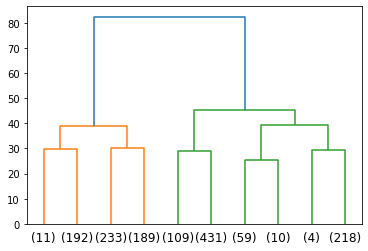

In [118]:
model = AgglomerativeClustering(affinity='euclidean', 
                                linkage='ward', 
                                distance_threshold=0,
                                n_clusters=None)
model = model.fit(my_score)
plot_dendrogram(model, truncate_mode='lastp', p=10)

In [ ]:
df_score.mean()

PC1   -0.0000
PC2    0.0000
PC3    0.0000
PC4    0.0000
PC5    0.0000
PC6    0.0000
PC7    0.0000
PC8    0.0000
PC9    0.0000
dtype: float64